In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.set_option('display.max_columns', 100)

odata = pd.read_csv("SFBay.csv", sep=";")

In [12]:
odata

,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
0,1969-04-10 16:15:00,4.0,119.90,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10 16:16:00,4.0,119.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,0.7,NaN,NaN,1.6,236.0
2,1969-04-10 16:17:00,4.0,119.90,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10 16:18:00,4.0,119.90,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10 16:30:00,5.0,115.63,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,14.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194640,2014-02-24 12:15:00,18.0,54.95,28.0,NaN,NaN,0.29,3.4,NaN,7.8,89.0,7.8,NaN,1.23,47.0,NaN,NaN,30.38,12.68,22.87,NaN,NaN,NaN,NaN,NaN
194641,2014-02-24 12:15:00,18.0,54.95,29.0,NaN,NaN,0.29,3.5,NaN,7.8,89.0,7.8,NaN,1.19,45.0,NaN,NaN,30.36,12.69,22.86,NaN,NaN,NaN,NaN,NaN
194642,2014-02-24 12:15:00,18.0,54.95,30.0,NaN,NaN,0.30,3.5,NaN,7.8,89.0,7.8,NaN,1.26,48.0,NaN,NaN,30.41,12.68,22.90,NaN,NaN,NaN,NaN,NaN
194643,2014-02-24 12:15:00,18.0,54.95,31.0,NaN,NaN,0.30,3.6,NaN,7.8,89.0,7.8,NaN,1.29,49.0,NaN,NaN,30.37,12.68,22.87,NaN,NaN,NaN,NaN,NaN


In [22]:
missing = odata[odata['Calculated.Chlorophyll'].isnull() | odata['Calculated.Oxygen'].isnull() | odata['Calculated.SPM'].isnull()]
ccmissing = odata[odata['Calculated.Chlorophyll'].isnull()]
comissing = odata[odata['Calculated.Oxygen'].isnull()]
spmmissing = odata[odata['Calculated.SPM'].isnull()]    

print(missing.shape)
print(ccmissing.shape)
print(comissing.shape)
print(spmmissing.shape)

missing

(54976, 25)
(11623, 25)
(48655, 25)
(35808, 25)


,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
0,1969-04-10 16:15:00,4.0,119.90,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-04-10 16:16:00,4.0,119.90,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.10,NaN,0.7,NaN,NaN,1.6,236.0
2,1969-04-10 16:17:00,4.0,119.90,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-04-10 16:18:00,4.0,119.90,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,13.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-04-10 16:30:00,5.0,115.63,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,14.10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193765,2014-01-24 12:22:00,25.0,32.84,4.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193766,2014-01-24 12:22:00,25.0,32.84,5.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193767,2014-01-24 12:22:00,25.0,32.84,6.0,NaN,NaN,0.35,2.7,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN
193768,2014-01-24 12:22:00,25.0,32.84,7.0,NaN,NaN,0.35,2.6,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,30.81,11.69,23.39,NaN,NaN,NaN,NaN,NaN


In [18]:
notmissing = odata[odata['Calculated.Chlorophyll'].notnull() & odata['Calculated.Oxygen'].notnull() & odata['Calculated.SPM'].notnull()]
notmissing

,TimeStamp,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
40923,1993-01-26 15:18:00,18.0,54.95,1.0,1.1,0.73,0.35,1.0,9.3,8.7,96.0,9.5,8.9,0.12,11.0,1.3,NaN,16.38,10.92,12.33,0.68,40.95,7.73,2.59,131.78
40924,1993-01-26 15:18:00,18.0,54.95,2.0,NaN,NaN,0.35,1.0,NaN,8.7,97.0,9.6,NaN,0.12,11.0,NaN,NaN,16.50,10.93,12.43,NaN,NaN,NaN,NaN,NaN
40925,1993-01-26 15:18:00,18.0,54.95,3.0,NaN,NaN,0.35,1.0,NaN,8.7,97.0,9.6,NaN,0.11,10.0,NaN,NaN,16.70,10.94,12.58,NaN,NaN,NaN,NaN,NaN
40926,1993-01-26 15:18:00,18.0,54.95,4.0,NaN,NaN,0.34,1.0,NaN,8.6,96.0,9.5,NaN,0.10,10.0,NaN,NaN,17.02,10.94,12.82,NaN,NaN,NaN,NaN,NaN
40927,1993-01-26 15:18:00,18.0,54.95,5.0,NaN,NaN,0.34,1.0,NaN,8.7,98.0,9.6,NaN,0.09,9.0,NaN,NaN,18.39,10.87,13.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194640,2014-02-24 12:15:00,18.0,54.95,28.0,NaN,NaN,0.29,3.4,NaN,7.8,89.0,7.8,NaN,1.23,47.0,NaN,NaN,30.38,12.68,22.87,NaN,NaN,NaN,NaN,NaN
194641,2014-02-24 12:15:00,18.0,54.95,29.0,NaN,NaN,0.29,3.5,NaN,7.8,89.0,7.8,NaN,1.19,45.0,NaN,NaN,30.36,12.69,22.86,NaN,NaN,NaN,NaN,NaN
194642,2014-02-24 12:15:00,18.0,54.95,30.0,NaN,NaN,0.30,3.5,NaN,7.8,89.0,7.8,NaN,1.26,48.0,NaN,NaN,30.41,12.68,22.90,NaN,NaN,NaN,NaN,NaN
194643,2014-02-24 12:15:00,18.0,54.95,31.0,NaN,NaN,0.30,3.6,NaN,7.8,89.0,7.8,NaN,1.29,49.0,NaN,NaN,30.37,12.68,22.87,NaN,NaN,NaN,NaN,NaN


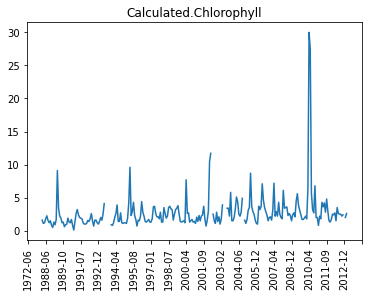

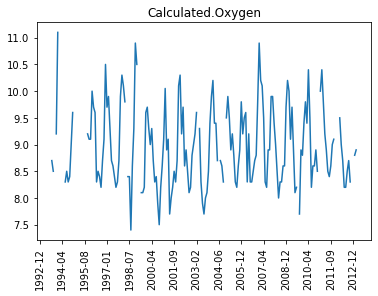

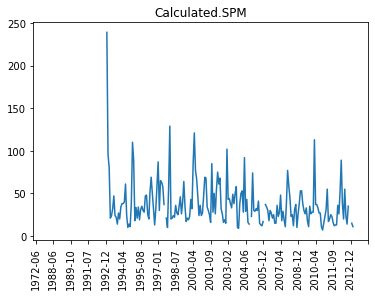

In [26]:
df_sfbay["MonthYear"] = odata["TimeStamp"].apply(lambda x: x[:7])
df_sf_bay_grouped_4 = df_sfbay[(df_sfbay["Station.Number"] == 4.0) 
                               & (df_sfbay["Depth"] == 2.0)].copy(deep=True).groupby(["MonthYear"]).mean()


only = ['Calculated.Chlorophyll', 'Calculated.Oxygen', 'Calculated.SPM']

for column in df_sf_bay_grouped_4.columns:
    if column not in only:
        continue
    else:
        plt.plot(df_sf_bay_grouped_4.index, df_sf_bay_grouped_4[column])
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MaxNLocator(22))
        plt.title(column)
        plt.xticks(rotation=90)
        plt.savefig("figures/{}.png".format(column), dpi=300)
        plt.show()
        

In [70]:
interpolated = df_sf_bay_grouped_4.copy(deep=True)
interpolated.index = pd.to_datetime(interpolated.index)

#interpolated[interpolated['Calculated.Chlorophyll'].isnull()].interpolate(method='time', axis=1, inplace = True)
#interpolated[interpolated['Calculated.Oxygen'].isnull()].interpolate(method='time', axis=1, inplace = True)
#interpolated[interpolated['Calculated.SPM'].isnull()].interpolate(method='time', axis=1, inplace = True)

#interpolated[interpolated['Calculated.Chlorophyll'].isnull()]['Calculated.Chlorophyll'] = np.nan
#interpolated[interpolated['Calculated.Oxygen'].isnull()]['Calculated.Oxygen'] = np.nan
#interpolated[interpolated['Calculated.SPM'].isnull()]['Calculated.SPM'] = np.nan


interpolated.interpolate(axis=1, inplace = True)

#interpolated[interpolated['Calculated.Oxygen'].isnull() | interpolated['Calculated.Chlorophyll'].isnull() | interpolated['Calculated.SPM'].isnull()]
interpolated

,Station.Number,Distance.from.36,Depth,Discrete.Chlorophyll,Chlorophyll.a.a.PHA,Fluorescence,Calculated.Chlorophyll,Discrete.Oxygen,Oxygen.Electrode.Output,Oxygen.Saturation.percent,Calculated.Oxygen,Discrete.SPM,Optical.Backscatter,Calculated.SPM,Measured.Extinction.Coefficient,Calculated.Extinction.Coefficient,Salinity,Temperature,Sigma.t,Nitrite,Nitrate...Nitrite,Ammonium,Phosphate,Silicate
MonthYear,,,,,,,,,,,,,,,,,,,,,,,,
1969-04-01,4.0,119.9,2.0,1.878571,1.757143,1.635714,1.514286,1.392857,1.271429,1.150000,1.028571,0.907143,0.785714,0.664286,0.542857,0.421429,0.30,13.10,6.900,0.70,1.000000,1.300000,1.60,236.00
1969-05-01,4.0,119.9,2.0,6.666667,11.333333,16.000000,20.666667,25.333333,30.000000,34.666667,39.333333,44.000000,35.220000,26.440000,17.660000,8.880000,0.10,18.70,9.900,1.10,1.100000,1.100000,1.10,1.10
1969-06-01,4.0,119.9,2.0,2.444444,2.888889,3.333333,3.777778,4.222222,4.666667,5.111111,5.555556,6.000000,4.820000,3.640000,2.460000,1.280000,0.10,19.80,16.240,12.68,9.120000,5.560000,2.00,110.00
1969-07-01,4.0,119.9,2.0,1.871429,1.742857,1.614286,1.485714,1.357143,1.228571,1.100000,0.971429,0.842857,0.714286,0.585714,0.457143,0.328571,0.20,21.90,10.955,0.01,0.506667,1.003333,1.50,183.00
1969-08-01,4.0,119.9,2.0,12.888889,23.777778,34.666667,45.555556,56.444444,67.333333,78.222222,89.111111,100.000000,80.320000,60.640000,40.960000,21.280000,1.60,21.00,10.700,0.40,1.100000,1.800000,2.50,136.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-01,4.0,119.9,2.0,1.403333,0.806667,0.210000,2.200000,5.250000,8.300000,93.000000,8.300000,4.655000,1.010000,35.000000,25.450000,15.900000,6.35,19.00,3.240,3.24,3.240000,3.240000,3.24,3.24
2012-11-01,4.0,119.9,2.0,2.400000,0.680000,1.540000,2.400000,3.540000,4.680000,5.820000,6.960000,8.100000,8.100000,8.100000,8.100000,8.100000,8.10,8.10,8.100,8.10,8.100000,8.100000,8.10,8.10
2012-12-01,4.0,119.9,2.0,1.300000,0.480000,3.082857,5.685714,8.288571,10.891429,13.494286,16.097143,18.700000,15.170000,11.640000,8.110000,4.580000,1.05,13.76,13.760,13.76,13.760000,13.760000,13.76,13.76


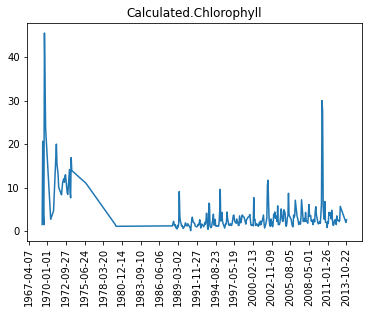

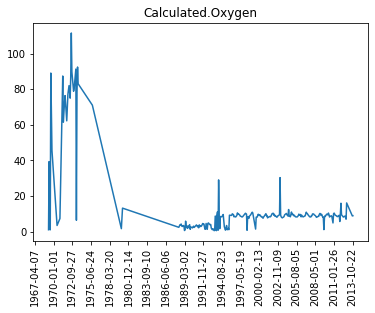

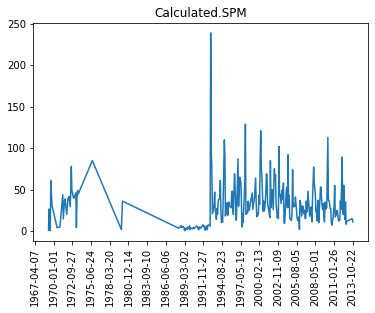

In [71]:
only = ['Calculated.Chlorophyll', 'Calculated.Oxygen', 'Calculated.SPM']

for column in interpolated.columns:
    if column not in only:
        continue
    else:
        plt.plot(interpolated.index, interpolated[column])
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.MaxNLocator(22))
        plt.title(column)
        plt.xticks(rotation=90)
        plt.savefig("figures/{}.png".format(column), dpi=300)
        plt.show()
        